# Evaluation of Model Results
## Model M043

In [51]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
import pprint
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

test = pd.read_csv('../input/test.csv')

In [52]:
tracking = pd.read_csv('../tracking/tracking.csv')
BEST_PUBLIC_RUN_ID = tracking.loc[tracking['lb_score'] == tracking['lb_score'].min()]['run_id'].values[0]
BEST_PUBLIC_SCORE = tracking.loc[tracking['lb_score'] == tracking['lb_score'].min()]['lb_score'].values[0]
print('------------------------------------------------------')
print('Currently the best public LB score is model {} with a score of {:.4f}'.format(BEST_PUBLIC_RUN_ID,
                                                                                     BEST_PUBLIC_SCORE))
print('------------------------------------------------------')
tracking.dropna(subset=['gml_oof_score']).sort_values('gml_oof_score').head()

------------------------------------------------------
Currently the best public LB score is model 0708_1639 with a score of -1.6420
------------------------------------------------------


,run_id,model_number,eval_metric,n_estimators,early_stopping_rounds,random_state,n_threads,learning_rate,n_fold,model_type,training_time,n_features,depth,gml_oof_score,oof_score,lb_score,1JHC_mae_cv,2JHH_mae_cv,1JHN_mae_cv,2JHN_mae_cv,2JHC_mae_cv,3JHH_mae_cv,3JHC_mae_cv,3JHN_mae_cv,1JHC_std_mae_cv,2JHH_std_mae_cv,1JHN_std_mae_cv,2JHN_std_mae_cv,2JHC_std_mae_cv,3JHH_std_mae_cv,3JHC_std_mae_cv,3JHN_std_mae_cv,1JHC_tr_sec_f1,1JHC_pred_sec_f1,1JHC_tr_sec_f2,1JHC_pred_sec_f2,2JHH_tr_sec_f1,2JHH_pred_sec_f1,2JHH_tr_sec_f2,2JHH_pred_sec_f2,1JHN_tr_sec_f1,1JHN_pred_sec_f1,1JHN_tr_sec_f2,1JHN_pred_sec_f2,2JHN_tr_sec_f1,2JHN_pred_sec_f1,2JHN_tr_sec_f2,2JHN_pred_sec_f2,2JHC_tr_sec_f1,2JHC_pred_sec_f1,2JHC_tr_sec_f2,2JHC_pred_sec_f2,3JHH_tr_sec_f1,3JHH_pred_sec_f1,3JHH_tr_sec_f2,3JHH_pred_sec_f2,3JHC_tr_sec_f1,3JHC_pred_sec_f1,3JHC_tr_sec_f2,3JHC_pred_sec_f2,3JHN_tr_sec_f1,3JHN_pred_sec_f1,3JHN_tr_sec_f2,3JHN_pred_sec_f2,1JHC_csv_save_sec,2JHH_csv_save_sec,1JHN_csv_save_sec,2JHN_csv_save_sec,2JHC_csv_save_sec,3JHH_csv_save_sec,3JHC_csv_save_sec,3JHN_csv_save_sec,1JHC_tr_sec_f3,1JHC_pred_sec_f3,2JHH_tr_sec_f3,2JHH_pred_sec_f3,1JHN_tr_sec_f3,1JHN_pred_sec_f3,2JHN_tr_sec_f3,2JHN_pred_sec_f3,3JHH_tr_sec_f3,3JHH_pred_sec_f3,2JHC_tr_sec_f3,2JHC_pred_sec_f3,3JHC_tr_sec_f3,3JHC_pred_sec_f3,3JHN_tr_sec_f3,3JHN_pred_sec_f3,2JHN_f1_best_iter,2JHN_f2_best_iter,1JHN_f1_best_iter,1JHN_f2_best_iter,3JHN_f1_best_iter,3JHN_f2_best_iter,2JHH_f1_best_iter,2JHH_f2_best_iter,3JHH_f1_best_iter,3JHH_f2_best_iter,1JHC_f1_best_iter,1JHC_f2_best_iter,2JHC_f1_best_iter,2JHC_f2_best_iter,3JHC_f1_best_iter,3JHC_f2_best_iter,2JHNcv_f1,2JHNcv_f2,3JHNcv_f1,3JHNcv_f2,2JHCcv_f1,2JHCcv_f2,3JHCcv_f1,3JHCcv_f2,2JHHcv_f1,2JHHcv_f2,1JHNcv_f1,1JHNcv_f2,3JHHcv_f1,3JHHcv_f2,1JHCcv_f1,1JHCcv_f2
34,0710_2124,M043,MAE,500000.0,500.0,529.0,48.0,0.1,2.0,catboost,NaN,575.0,7.0,-1.5582,0.2527,NaN,0.5124,0.1382,0.3764,0.1478,0.2137,0.1552,0.2462,0.1199,0.002042,0.000291,0.014531,0.000057,0.000572,0.000509,0.000025,0.000456,5146.0,50.0,4946.0,46.0,2024.0,13.0,1928.0,13.0,2806.0,0.0,8293.0,1.0,512.0,1.0,684.0,1.0,9297.0,113.0,9670.0,123.0,3486.0,31.0,3446.0,28.0,13600.0,165.0,13217.0,173.0,862.0,3.0,945.0,1.0,NaN,25.0,25.0,23.0,25.0,26.0,25.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59700.0,72504.0,60325.0,176923.0,92065.0,89628.0,167329.0,158250.0,234289.0,232242.0,311944.0,300150.0,417502.0,436044.0,484850.0,499991.0,0.147745,0.147859,0.120377,0.119466,0.213129,0.214274,0.246189,0.24624,0.138484,0.137902,0.390914,0.361851,0.154694,0.155712,0.510383,0.514468
31,0708_1639,M040,MAE,500000.0,500.0,529.0,16.0,0.1,2.0,catboost,59711.0,228.0,7.0,-1.5419,0.2635,-1.642,0.5782,0.1421,0.3983,0.1435,0.2191,0.1500,0.2459,0.1158,0.001862,0.000917,0.014464,0.000710,0.000642,0.000924,0.000340,0.000406,6278.0,74.0,3275.0,61.0,1567.0,21.0,1861.0,27.0,2812.0,1.0,2598.0,1.0,491.0,3.0,542.0,3.0,5400.0,125.0,5954.0,154.0,2870.0,49.0,5164.0,44.0,7791.0,133.0,10745.0,149.0,524.0,3.0,549.0,4.0,NaN,32.0,37.0,33.0,33.0,31.0,33.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89061.0,98109.0,121959.0,111265.0,113287.0,119236.0,227739.0,268313.0,317609.0,335002.0,402211.0,352328.0,499942.0,499155.0,499929.0,499978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,0706_2029,M037,MAE,500000.0,50.0,529.0,16.0,0.1,2.0,catboost,40607.0,195.0,7.0,-1.5106,0.2749,-1.608,0.5959,0.1440,0.4293,0.1419,0.2255,0.1537,0.2650,0.1176,0.000660,0.000577,0.059290,0.001560,0.000879,0.000098,0.000187,0.000331,2989.0,63.0,2924.0,60.0,1319.0,17.0,1299.0,20.0,4581.0,1.0,328.0,0.0,419.0,2.0,410.0,2.0,4731.0,122.0,4736.0,124.0,1858.0,34.0,1991.0,26.0,5285.0,166.0,5406.0,162.0,580.0,5.0,591.0,4.0,27.0,25.0,25.0,25.0,28.0,26.0,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101997.0,97220.0,265132.0,20518.0,130710.0,133423.0,254087.0,251872.0,298296.0,322640.0,419882.0,413787.0,499987.0,499961.0,499994.0,499968.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [53]:
tracking.loc[tracking['model_number'] == 'M043']

,run_id,model_number,eval_metric,n_estimators,early_stopping_rounds,random_state,n_threads,learning_rate,n_fold,model_type,training_time,n_features,depth,gml_oof_score,oof_score,lb_score,1JHC_mae_cv,2JHH_mae_cv,1JHN_mae_cv,2JHN_mae_cv,2JHC_mae_cv,3JHH_mae_cv,3JHC_mae_cv,3JHN_mae_cv,1JHC_std_mae_cv,2JHH_std_mae_cv,1JHN_std_mae_cv,2JHN_std_mae_cv,2JHC_std_mae_cv,3JHH_std_mae_cv,3JHC_std_mae_cv,3JHN_std_mae_cv,1JHC_tr_sec_f1,1JHC_pred_sec_f1,1JHC_tr_sec_f2,1JHC_pred_sec_f2,2JHH_tr_sec_f1,2JHH_pred_sec_f1,2JHH_tr_sec_f2,2JHH_pred_sec_f2,1JHN_tr_sec_f1,1JHN_pred_sec_f1,1JHN_tr_sec_f2,1JHN_pred_sec_f2,2JHN_tr_sec_f1,2JHN_pred_sec_f1,2JHN_tr_sec_f2,2JHN_pred_sec_f2,2JHC_tr_sec_f1,2JHC_pred_sec_f1,2JHC_tr_sec_f2,2JHC_pred_sec_f2,3JHH_tr_sec_f1,3JHH_pred_sec_f1,3JHH_tr_sec_f2,3JHH_pred_sec_f2,3JHC_tr_sec_f1,3JHC_pred_sec_f1,3JHC_tr_sec_f2,3JHC_pred_sec_f2,3JHN_tr_sec_f1,3JHN_pred_sec_f1,3JHN_tr_sec_f2,3JHN_pred_sec_f2,1JHC_csv_save_sec,2JHH_csv_save_sec,1JHN_csv_save_sec,2JHN_csv_save_sec,2JHC_csv_save_sec,3JHH_csv_save_sec,3JHC_csv_save_sec,3JHN_csv_save_sec,1JHC_tr_sec_f3,1JHC_pred_sec_f3,2JHH_tr_sec_f3,2JHH_pred_sec_f3,1JHN_tr_sec_f3,1JHN_pred_sec_f3,2JHN_tr_sec_f3,2JHN_pred_sec_f3,3JHH_tr_sec_f3,3JHH_pred_sec_f3,2JHC_tr_sec_f3,2JHC_pred_sec_f3,3JHC_tr_sec_f3,3JHC_pred_sec_f3,3JHN_tr_sec_f3,3JHN_pred_sec_f3,2JHN_f1_best_iter,2JHN_f2_best_iter,1JHN_f1_best_iter,1JHN_f2_best_iter,3JHN_f1_best_iter,3JHN_f2_best_iter,2JHH_f1_best_iter,2JHH_f2_best_iter,3JHH_f1_best_iter,3JHH_f2_best_iter,1JHC_f1_best_iter,1JHC_f2_best_iter,2JHC_f1_best_iter,2JHC_f2_best_iter,3JHC_f1_best_iter,3JHC_f2_best_iter,2JHNcv_f1,2JHNcv_f2,3JHNcv_f1,3JHNcv_f2,2JHCcv_f1,2JHCcv_f2,3JHCcv_f1,3JHCcv_f2,2JHHcv_f1,2JHHcv_f2,1JHNcv_f1,1JHNcv_f2,3JHHcv_f1,3JHHcv_f2,1JHCcv_f1,1JHCcv_f2
34,0710_2124,M043,MAE,500000.0,500.0,529.0,48.0,0.1,2.0,catboost,NaN,575.0,7.0,-1.5582,0.2527,NaN,0.5124,0.1382,0.3764,0.1478,0.2137,0.1552,0.2462,0.1199,0.002042,0.000291,0.014531,0.000057,0.000572,0.000509,0.000025,0.000456,5146.0,50.0,4946.0,46.0,2024.0,13.0,1928.0,13.0,2806.0,0.0,8293.0,1.0,512.0,1.0,684.0,1.0,9297.0,113.0,9670.0,123.0,3486.0,31.0,3446.0,28.0,13600.0,165.0,13217.0,173.0,862.0,3.0,945.0,1.0,NaN,25.0,25.0,23.0,25.0,26.0,25.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59700.0,72504.0,60325.0,176923.0,92065.0,89628.0,167329.0,158250.0,234289.0,232242.0,311944.0,300150.0,417502.0,436044.0,484850.0,499991.0,0.147745,0.147859,0.120377,0.119466,0.213129,0.214274,0.246189,0.24624,0.138484,0.137902,0.390914,0.361851,0.154694,0.155712,0.510383,0.514468


In [55]:
RUN_ID = '-1.5582'
# MODEL_NO = 'M033'
sub_file = [x for x in os.listdir('../submissions/') if RUN_ID in x][0]
fi_file = [x for x in os.listdir('../fi/') if '0710_2124' in x][0]
oof_file = [x for x in os.listdir('../oof') if RUN_ID in x][0]
# print(sub_file)
# Read in files for new RUN_ID
sub = pd.read_csv(f'../submissions/{sub_file}')
oof = pd.read_csv(f'../oof/{oof_file}')
fi = pd.read_csv(f'../fi/{fi_file}')

# Read in files for best RUN_ID
bsub_file = [x for x in os.listdir('../submissions/') if BEST_PUBLIC_RUN_ID in x][0]
#bfi_file = [x for x in os.listdir('../fi/') if BEST_PUBLIC_RUN_ID in x][0]
boof_file = [x for x in os.listdir('../oof') if BEST_PUBLIC_RUN_ID in x][0]
bsub = pd.read_csv(f'../submissions/{bsub_file}')
boof = pd.read_csv(f'../oof/{boof_file}')
# bfi = pd.read_csv(f'../fi/{bfi_file}')

## Features with no importance

In [6]:
thresh = 0.01
fi_mean = fi.groupby('feature').mean()
no_importance_features = fi_mean.loc[fi_mean['importance'] <= thresh].index.tolist()
print('Features with no importance at all')
pprint.pprint(no_importance_features)

Features with no importance at all
['10th_closest_to_0_atomic_mass',
 '10th_closest_to_0_spin_multiplicity',
 '10th_closest_to_0_valence',
 '10th_closest_to_1_spin_multiplicity',
 '13th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '13th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '14th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '14th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '15th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '15th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '16th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '16th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '17th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '17th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '18th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '18th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '19th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '19th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '20th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '20th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '21st_closest_to_0_a

## Feature with no importance by type

In [7]:
fi_minus_non_imp = fi.loc[~fi['feature'].isin(no_importance_features)]
thresh = 0.005
for i, d in fi_minus_non_imp.groupby('type'):
    d_mean = d.groupby('feature').mean()
    bad_cols = d_mean.loc[d_mean['importance'] <= thresh].index
    print('================== Type {} =================='.format(i))
    print([x for x in bad_cols])

================== Type 1JHC ==================
['NH', 'angle_0_closest0_1', 'angle_1_0_closest0', 'closest_to_0_atomic_mass', 'closest_to_1_atomic_mass', 'closest_to_1_atomic_number', 'closest_to_1_spin_multiplicity', 'closest_to_1_spin_multiplicity_x_cube_inv_dist', 'closest_to_1_valence', 'feat_acsf_g2_H_[0.01, 2]_atom0', 'feat_acsf_g2_H_[0.1, 2]_atom0', 'feat_acsf_g2_N_[1, 2]_atom0', 'feat_acsf_g4_C_C_[0.01, 4, 1]_atom0', 'feat_acsf_g4_N_H_[0.01, 4, -1]_atom1', 'feat_acsf_g4_N_N_[0.01, 4, -1]_atom0', 'feat_acsf_g4_N_N_[0.01, 4, 1]_atom0', 'feat_acsf_g4_N_N_[1, 4, -1]_atom0', 'feat_acsf_g4_O_C_[0.1, 4, 1]_atom0', 'feat_acsf_g4_O_N_[0.01, 4, -1]_atom0', 'feat_acsf_g4_O_N_[0.1, 4, -1]_atom0', 'yukawa_N.x', 'yukawa_O.x', 'yukawa_O.y']
================== Type 1JHN ==================
['10th_closest_to_0_atomic_mass_x_cube_inv_dist', '10th_closest_to_1_atomic_mass_x_cube_inv_dist', '12th_closest_to_0_atomic_mass_x_cube_inv_dist', '12th_closest_to_1_atomic_mass_x_cube_inv_dist', '5th_close

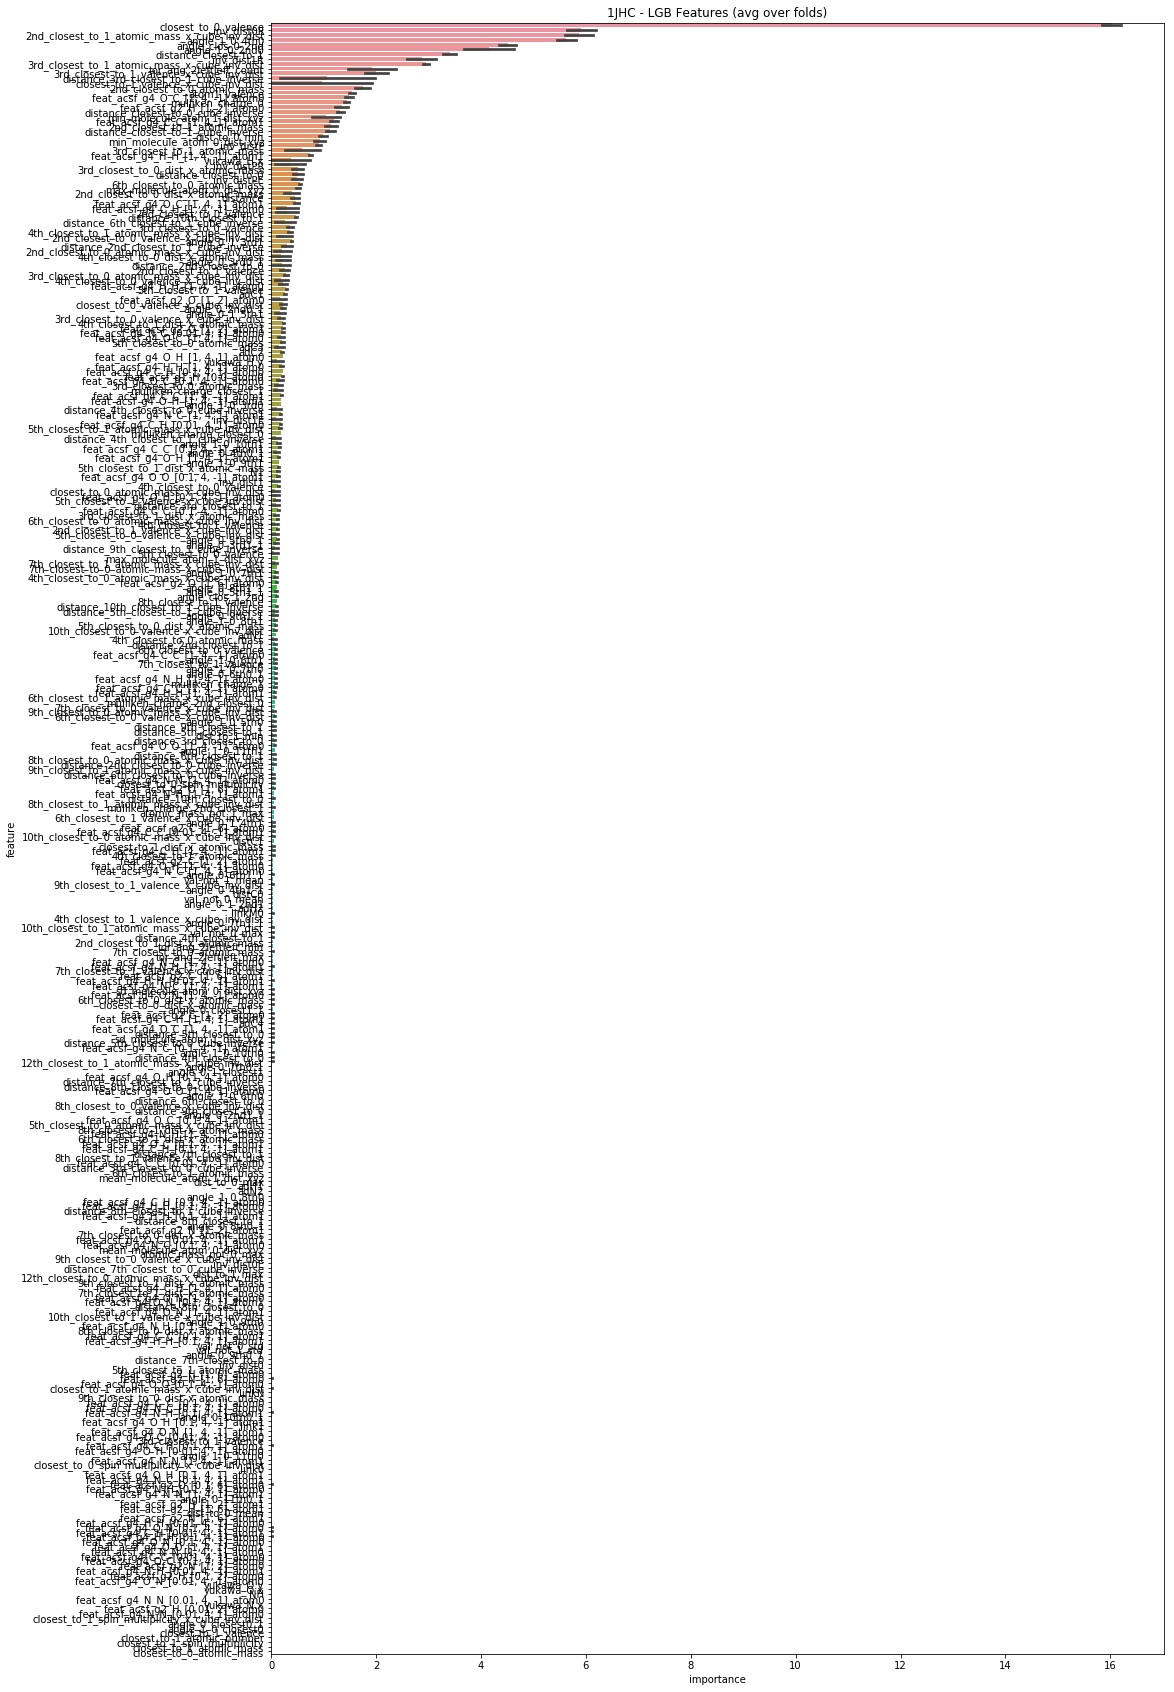

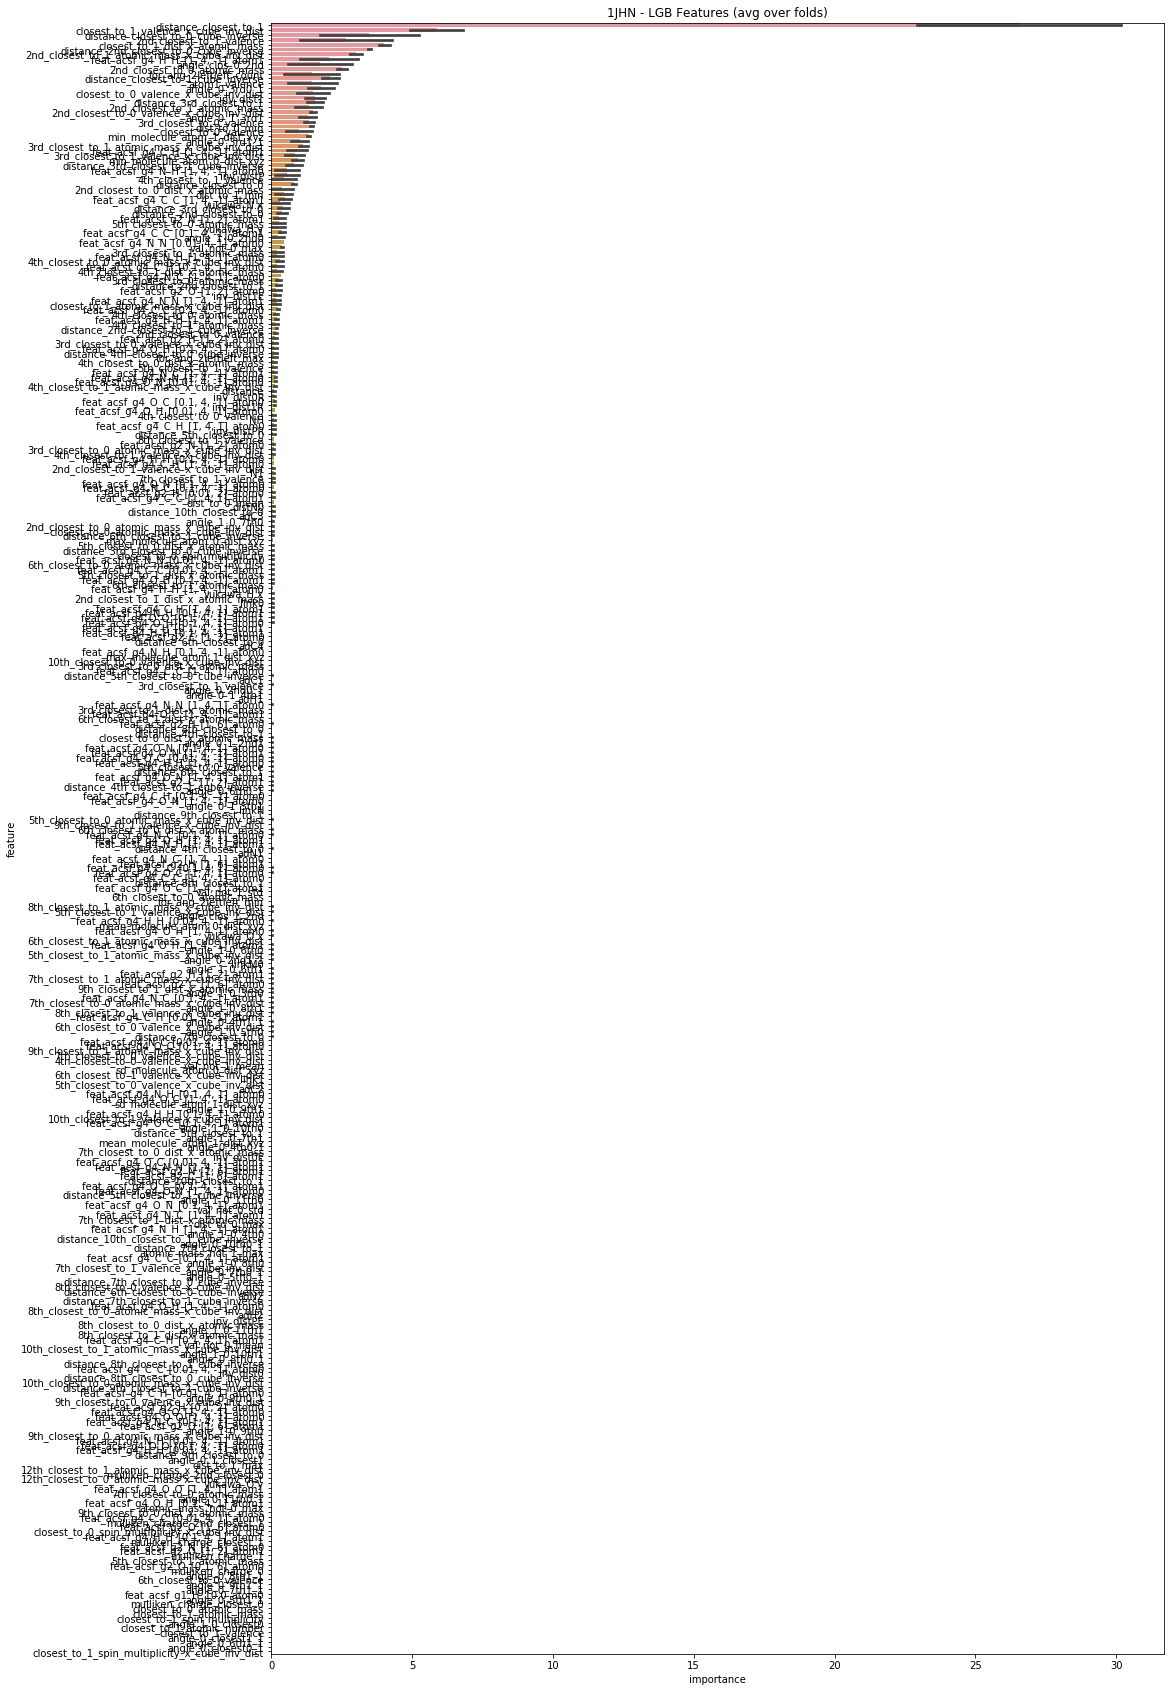

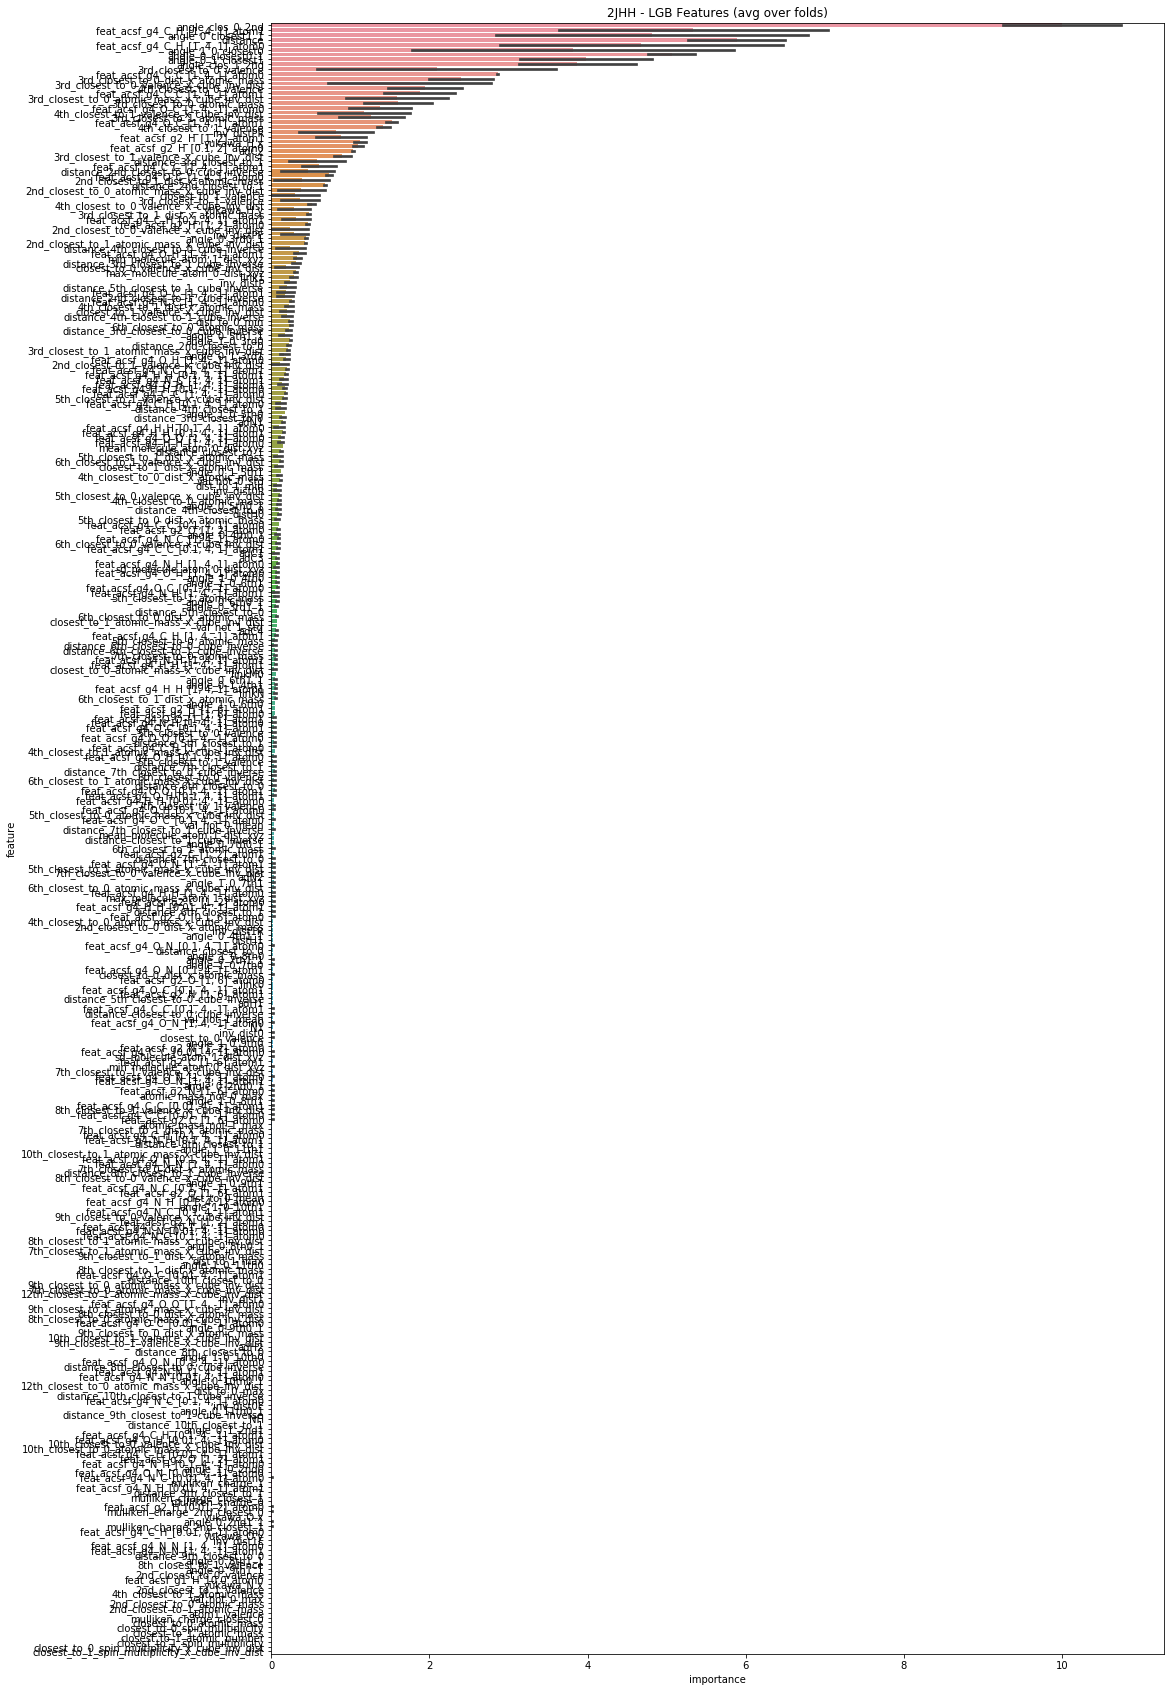

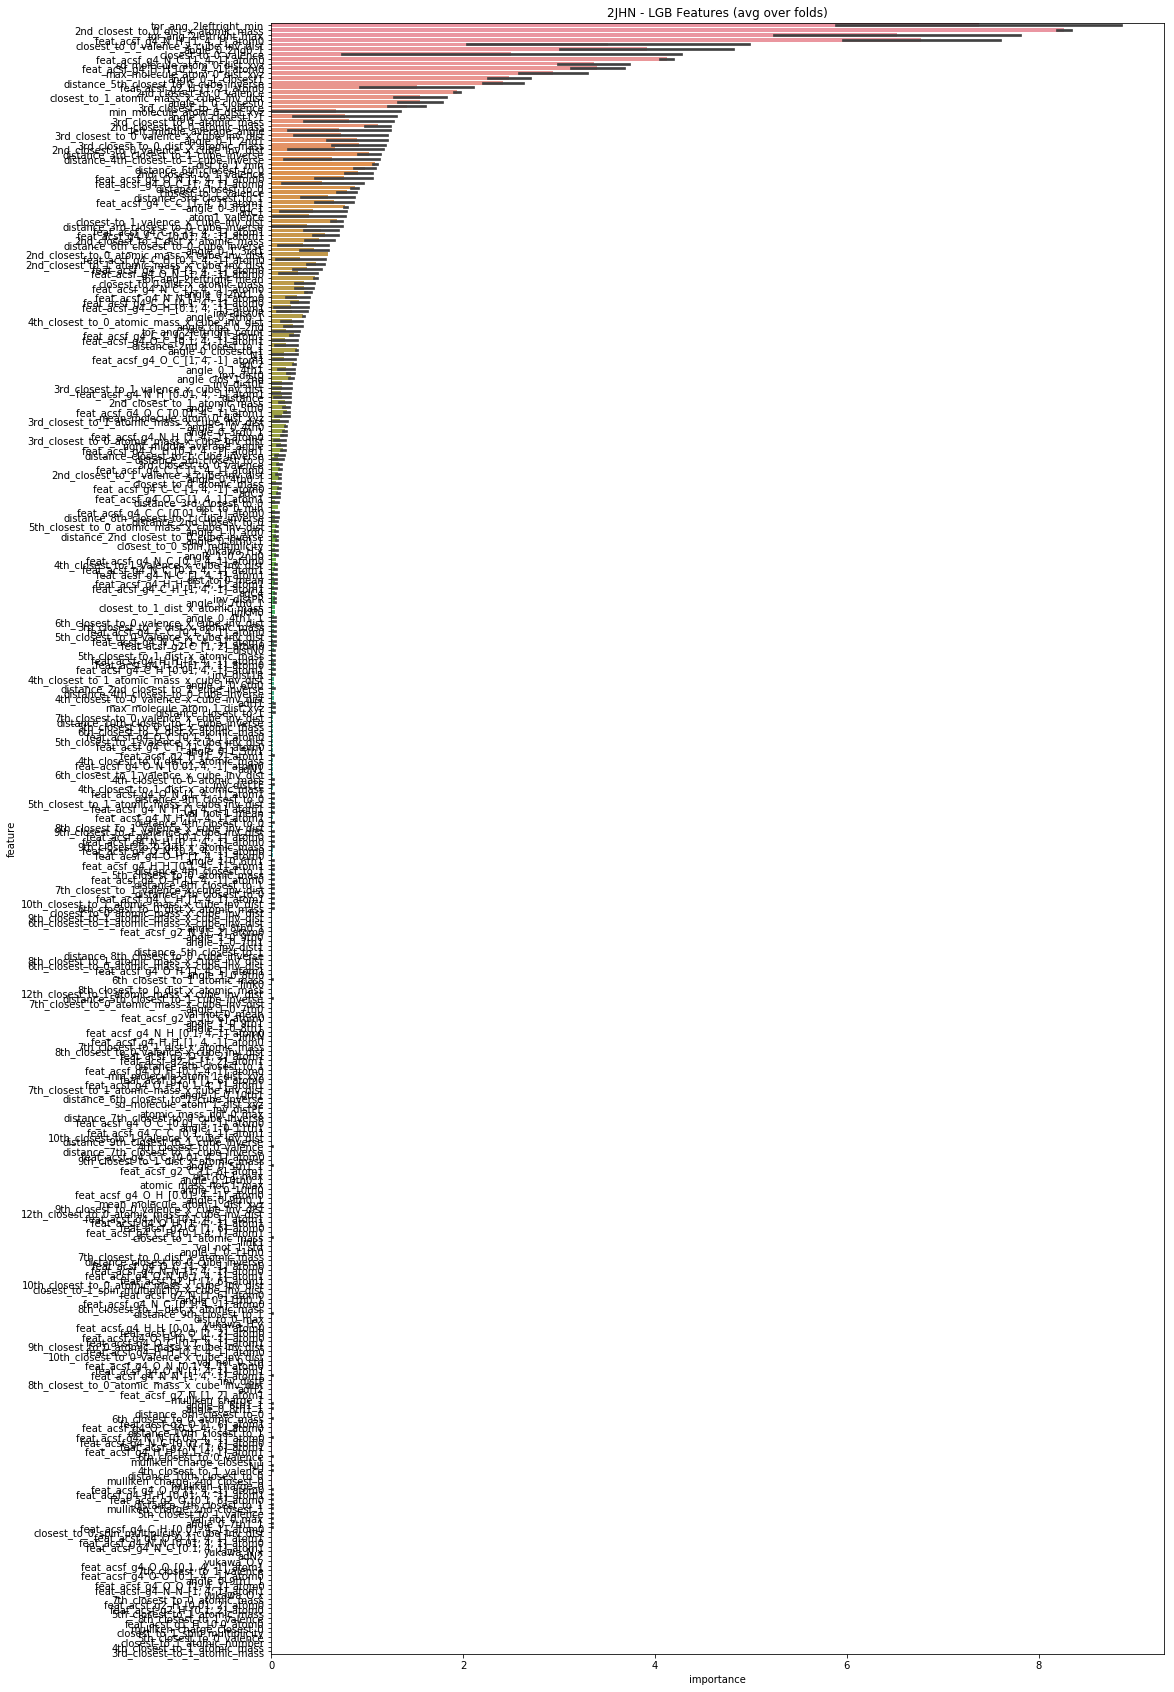

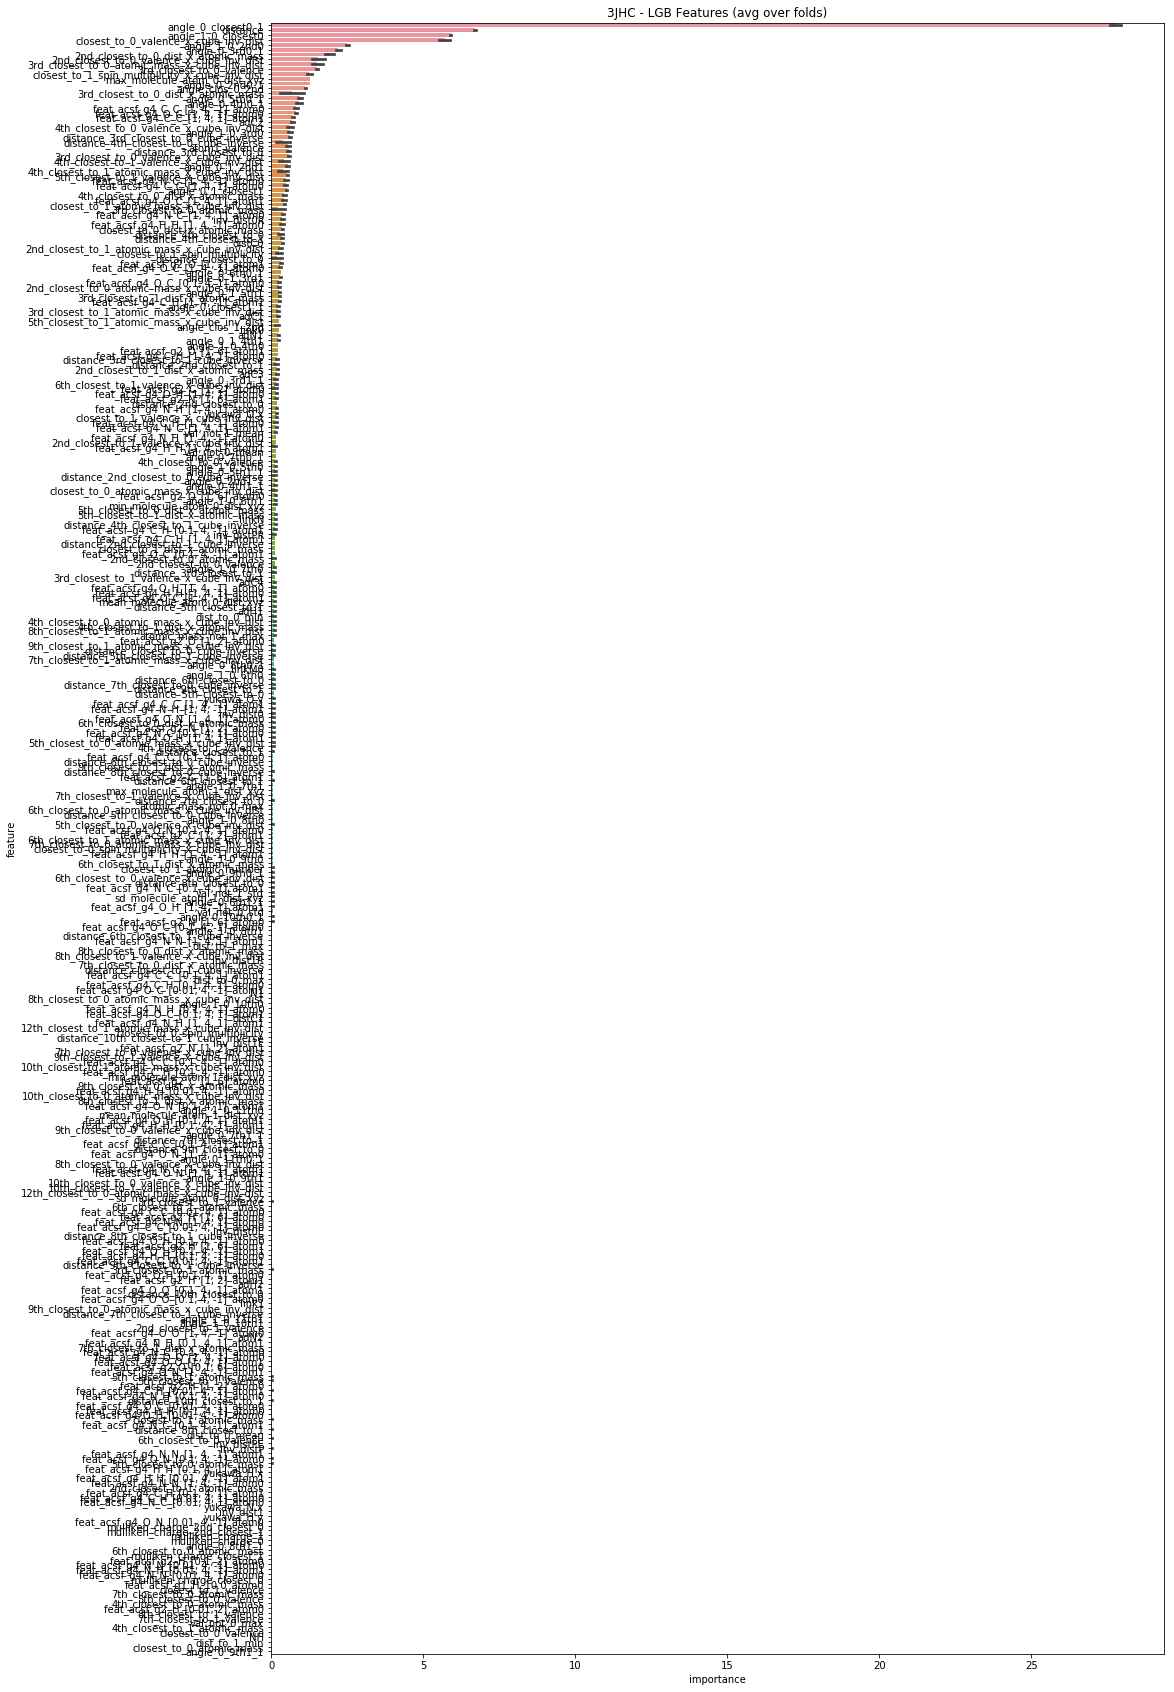

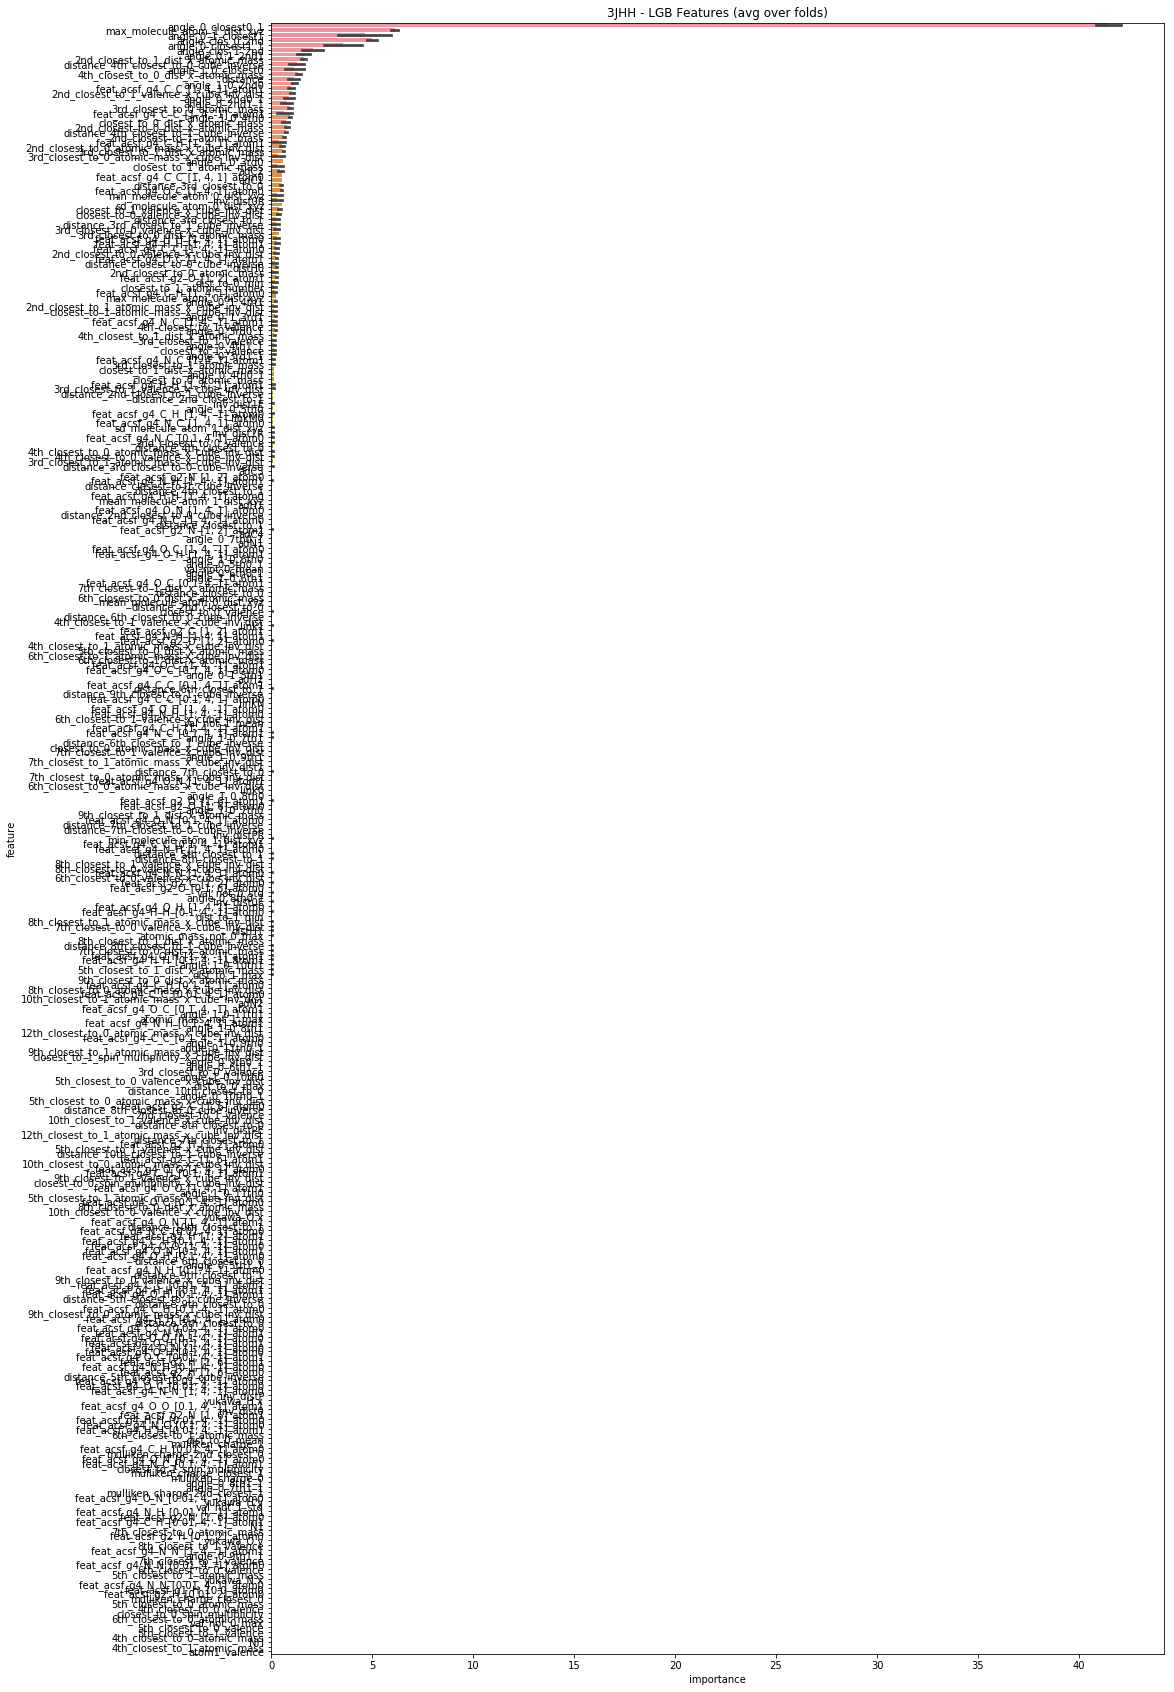

In [8]:
for i, d in fi_minus_non_imp.groupby('type'):
    plt.figure(figsize=(16, 30));
    sns.barplot(x="importance", y="feature", data=d.sort_values(by="importance", ascending=False));
    plt.title('{} - LGB Features (avg over folds)'.format(i))
    plt.show()

# Compare Submission Files

In [40]:
sub = sub.sort_values('id').reset_index(drop=True)
bsub = bsub.sort_values('id').reset_index(drop=True)

In [41]:
sub['type'] = test['type']
bsub['type'] = test['type']

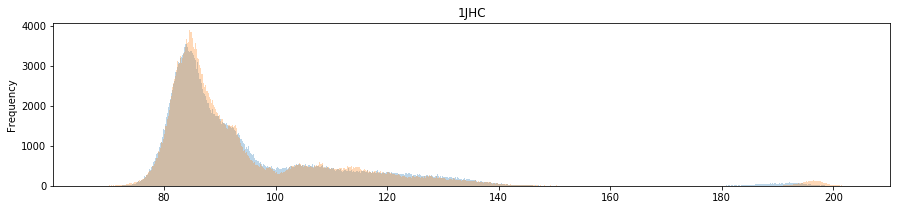

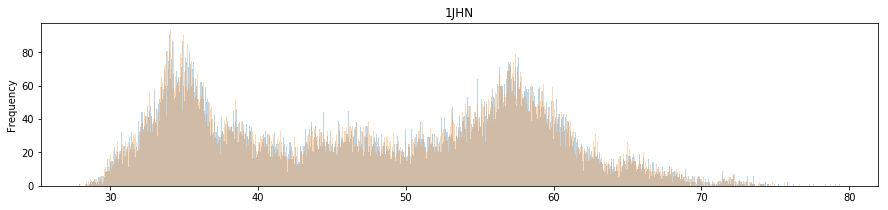

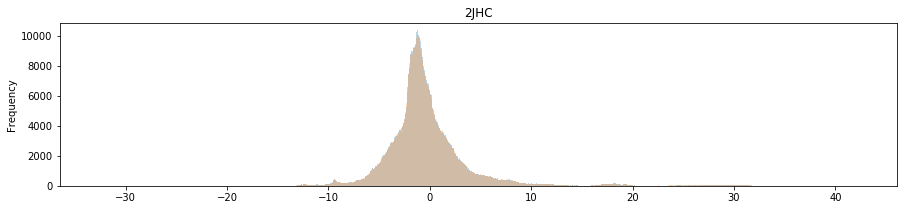

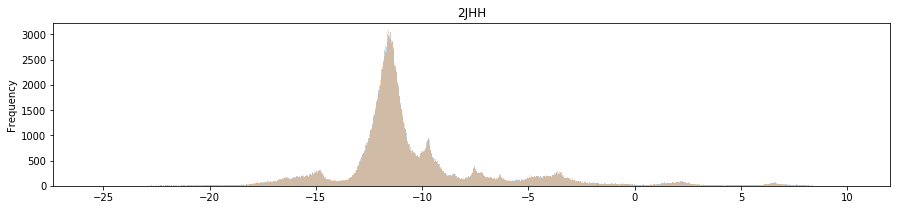

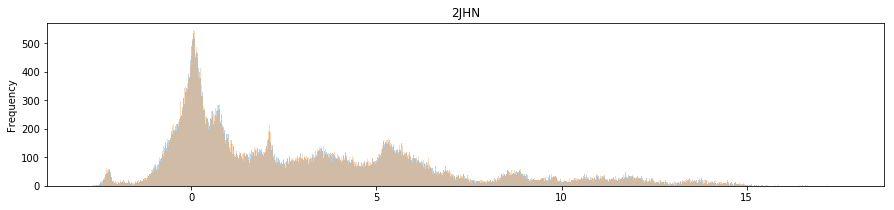

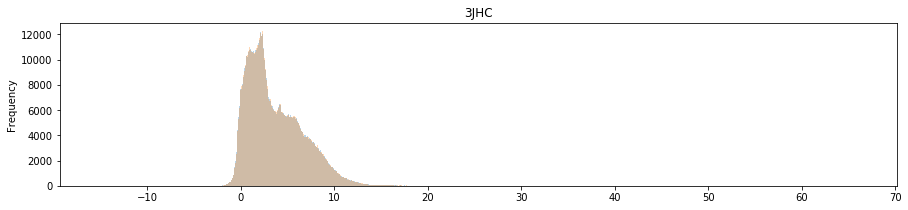

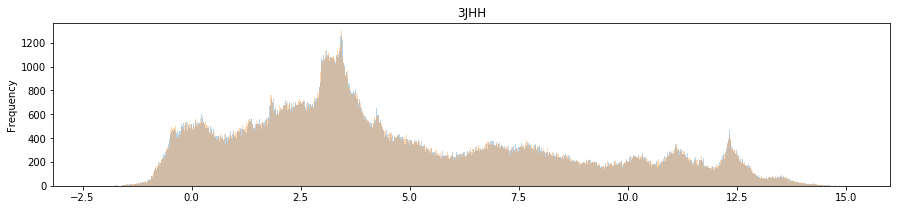

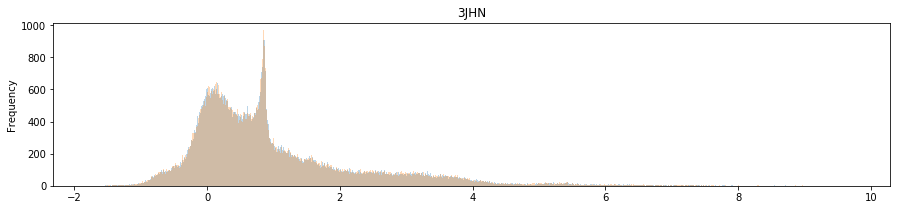

In [50]:
for i, d in sub.groupby('type'):
    d['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000, alpha=0.3)
    # also plot best sub
    d_bsub = bsub.loc[bsub['type'] == i]
    d_bsub['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000, alpha=0.3)
    #d_oof = oof.loc[oof['type'] == i]
    #d_oof['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000, alpha=0.3)
    plt.show()

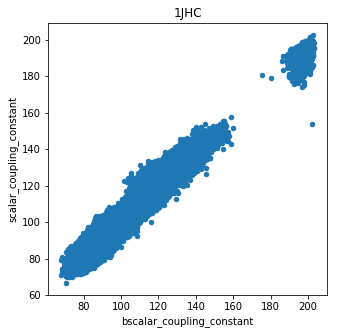

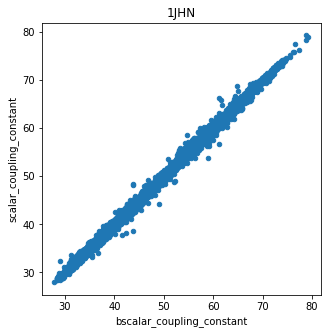

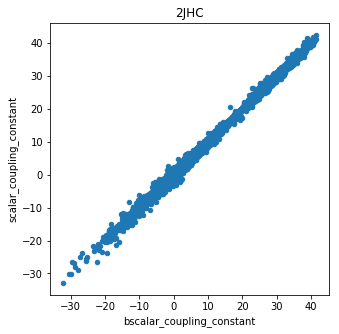

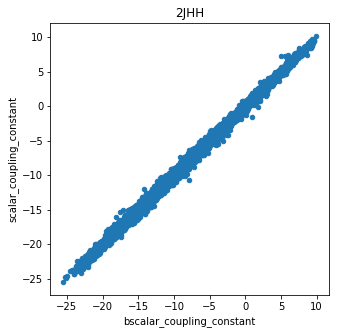

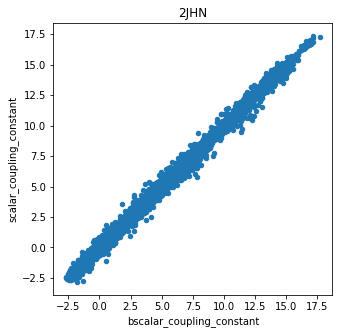

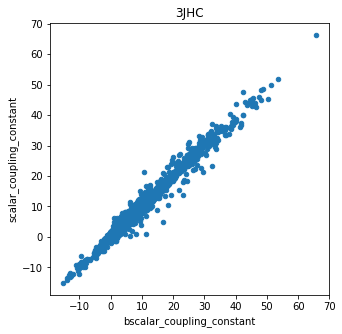

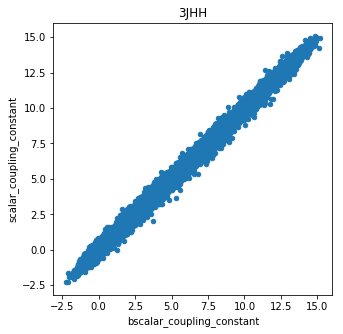

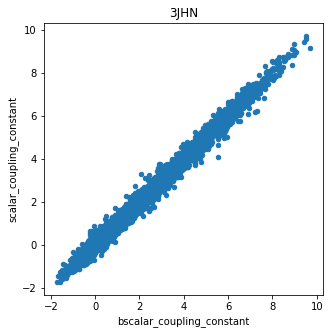

In [48]:
sub['bscalar_coupling_constant'] = bsub['scalar_coupling_constant']
# Scatter plot of submission
for i, d in sub.groupby('type'):
    d.plot(x='bscalar_coupling_constant', y='scalar_coupling_constant', kind='scatter', figsize=(5, 5), title=i)

# Compare OOF

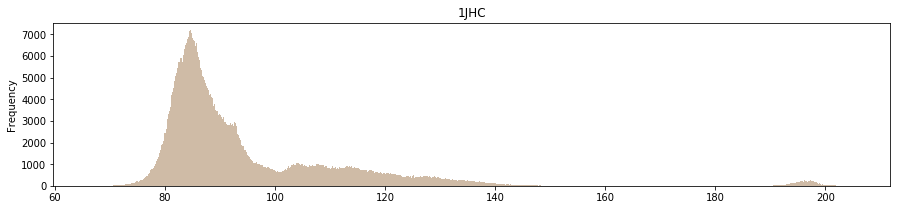

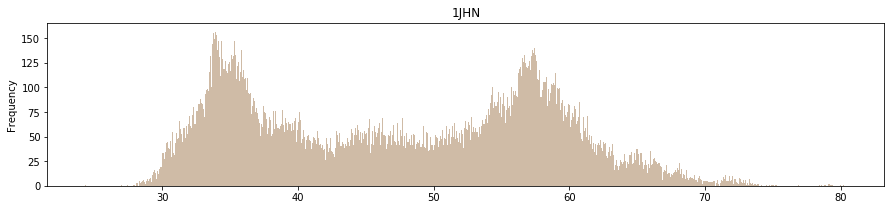

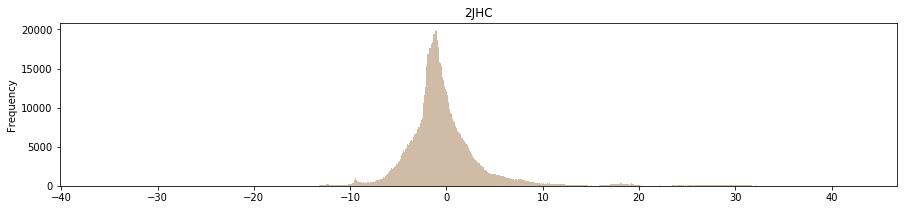

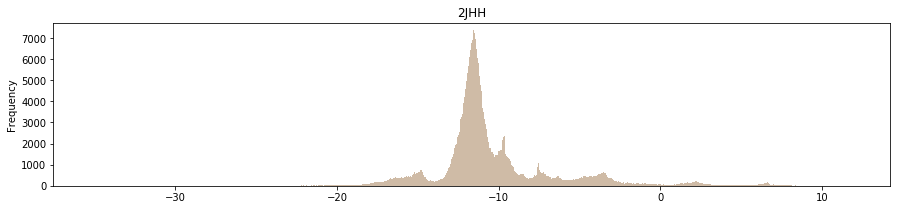

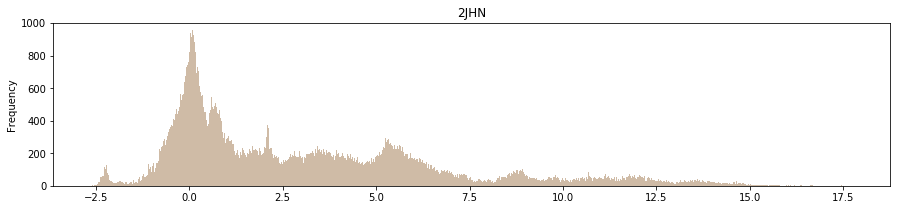

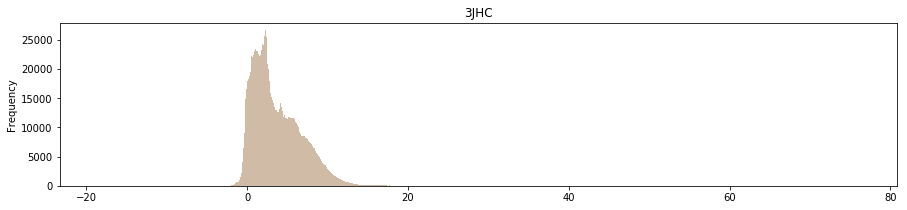

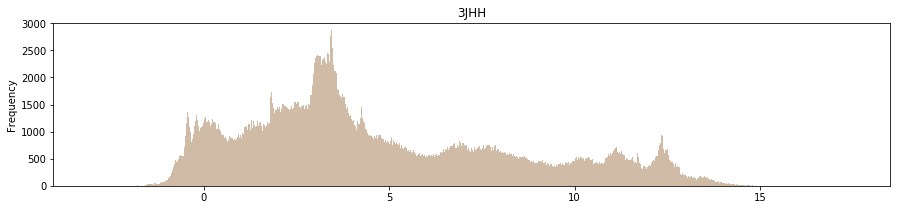

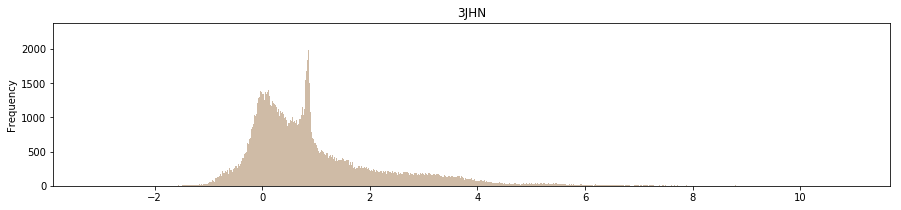

In [12]:
for i, d in oof.groupby('type'):
    d['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000, alpha=0.3)
    # also plot best sub
    d_boof = boof.loc[boof['type'] == i]
    d_boof['scalar_coupling_constant'].plot(kind='hist', figsize=(15, 3), title=i, bins=1000, alpha=0.3)
    plt.show()

# Update Leaderboard score

In [11]:
# LB_SCORE = -1.642
# tracking = pd.read_csv('../tracking/tracking.csv')
# tracking.loc[tracking['run_id'] == RUN_ID, 'lb_score'] = LB_SCORE
# tracking.to_csv('../tracking/tracking.csv', index=False)

# 3JHC
Good Features

In [61]:
jhc3 = fi.loc[fi['type'] == '3JHC'].groupby('feature').mean()

In [66]:
thresh = 0.01
important_feats = jhc3.loc[jhc3['importance'] >= thresh].index.tolist()
pprint.pprint(important_feats)

['10th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '10th_closest_to_0_valence_x_cube_inv_dist',
 '10th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '10th_closest_to_1_valence_x_cube_inv_dist',
 '12th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '12th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '13th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '13th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '14th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '14th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '15th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '15th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '16th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '16th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '2nd_closest_to_0_atomic_mass',
 '2nd_closest_to_0_atomic_mass_x_cube_inv_dist',
 '2nd_closest_to_0_dist_x_atomic_mass',
 '2nd_closest_to_0_valence',
 '2nd_closest_to_0_valence_x_cube_inv_dist',
 '2nd_closest_to_1_atomic_mass_x_cube_inv_dist',
 '2nd_closest_to_1_dist_x_atomic_mass',
 '2nd_closest_to_1_vale